In [1]:
import pandas as pd
#raw data from: https://www.clarin.si/repository/xmlui/handle/11356/1071

In [3]:
df = pd.read_csv("./Raw_Data/mep_rcv_vote_index.csv")

In [4]:
dfM = pd.read_json("./Raw_Data/mep_info.json")

In [5]:
df.tail()

,ids,1,2,3,4,5,6,7,8,9,...,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535
782,128717,6,6,6,6,6,6,6,6,6,...,1,1,1,1,0,0,0,0,0,0
783,128588,6,6,6,6,6,6,6,6,6,...,5,5,5,5,5,5,5,5,5,5
784,127330,6,6,6,6,6,6,6,6,6,...,0,0,1,0,1,0,0,0,0,0
785,125997,5,0,0,1,1,0,0,2,0,...,0,0,0,1,1,0,0,0,0,0
786,96993,1,0,2,1,1,1,0,1,0,...,1,0,2,0,1,2,0,0,0,2


In [6]:
pgdict = {col:int(dfM[col]['politicalGroupId']) for col in dfM.columns}

In [7]:
ctdict = {col:int(dfM[col]['countryId']) for col in dfM.columns}

In [8]:
ctndict = {col:dfM[col]['countryShort'] for col in dfM.columns}

In [9]:
npgdict = {col:int(dfM[col]['nationalPoliticalGroupId']) for col in dfM.columns}

In [10]:
df['PG_ID'] = df['ids'].map(pgdict)
df['NPG_ID'] = df['ids'].map(npgdict)
df['CT_ID'] = df['ids'].map(ctdict)
df['CT_Name'] = df['ids'].map(ctndict)
df[0] = 0

In [11]:
df

,ids,1,2,3,4,5,6,7,8,9,...,2531,2532,2533,2534,2535,PG_ID,NPG_ID,CT_ID,CT_Name,0
0,124990,5,1,1,1,0,5,5,5,5,...,5,5,5,5,5,4,203,26,SWE,0
1,124831,5,0,0,0,2,0,0,0,0,...,0,0,0,0,0,6,110,14,ITA,0
2,124797,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,6,110,14,ITA,0
3,124811,5,0,0,0,1,0,0,0,0,...,0,0,5,0,0,6,110,14,ITA,0
4,96897,1,0,0,0,1,2,2,0,2,...,2,2,2,2,2,6,218,27,GBR,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,128717,6,6,6,6,6,6,6,6,6,...,0,0,0,0,0,5,11,1,BEL,0
783,128588,6,6,6,6,6,6,6,6,6,...,5,5,5,5,5,2,205,26,SWE,0
784,127330,6,6,6,6,6,6,6,6,6,...,0,0,0,0,0,0,197,25,ESP,0
785,125997,5,0,0,1,1,0,0,2,0,...,0,0,0,0,0,0,191,25,ESP,0


In [12]:
dfM

,124990,124831,124797,124811,96897,125045,124842,99650,125048,96736,...,129164,26837,129073,129256,28617,128717,128588,127330,125997,96993
fullName,Lars ADAKTUSSON,Isabella ADINOLFI,Marco AFFRONTE,Laura AGEA,John Stuart AGNEW,Clara Eugenia AGUILERA GARCÍA,Daniela AIUTO,Tim AKER,Marina ALBIOL GUZMÁN,Jan Philipp ALBRECHT,...,Tom VANDENKENDELAERE,Lefteris CHRISTOFOROU,Urmas PAET,Emilian PAVEL,Inese VAIDERE,Sander LOONES,Linnéa ENGSTRÖM,Tania GONZÁLEZ PENAS,Javier COUSO PERMUY,Lorenzo FONTANA
from,2014-07-01,2014-07-01,2014-07-01,2014-07-01,2014-07-01,2014-07-01,2014-07-01,2014-07-01,2014-07-01,2014-07-01,...,2014-11-06,2014-11-03,2014-11-03,2014-11-01,2014-11-01,2014-10-14,2014-10-08,2014-09-11,2014-07-15,2014-07-11
twitterId,2294733241,2195622679,46416760,1977797946,None,939966774,2466169957,744743599,245074453,17131762,...,177605712,4022826012,1198416960,2362862240,222400131,370709666,25489542,2419290031,251290516,None
twitterScreenName,ladaktusson,isa_adinolfi,marcoaffronte,agealaura,None,claraaguilera7,danielaaiuto,tim_aker,marinaalbiol,janalbrecht,...,tomvdkendelaere,lefchristoforou,urmaspaet,pavelemilian,inesevaidere,sanderloones,linneaengstrom,taniagonzalezps,caninator,None
politicalGroupId,4,6,6,6,6,1,6,6,0,2,...,4,4,3,1,4,5,2,0,0,7
politicalGroupShort,EPP,EFDD,EFDD,EFDD,EFDD,S&D,EFDD,EFDD,GUE-NGL,Greens-EFA,...,EPP,EPP,ALDE,S&D,EPP,ECR,Greens-EFA,GUE-NGL,GUE-NGL,ENL
politicalGroupName,Group of the European People's Party (Christia...,Europe of Freedom and Direct Democracy Group,Europe of Freedom and Direct Democracy Group,Europe of Freedom and Direct Democracy Group,Europe of Freedom and Direct Democracy Group,Group of the Progressive Alliance of Socialist...,Europe of Freedom and Direct Democracy Group,Europe of Freedom and Direct Democracy Group,Confederal Group of the European United Left -...,Group of the Greens/European Free Alliance,...,Group of the European People's Party (Christia...,Group of the European People's Party (Christia...,Group of the Alliance of Liberals and Democrat...,Group of the Progressive Alliance of Socialist...,Group of the European People's Party (Christia...,European Conservatives and Reformists Group,Group of the Greens/European Free Alliance,Confederal Group of the European United Left -...,Confederal Group of the European United Left -...,Europe of Nations and Freedom Group
countryId,26,14,14,14,27,25,14,27,25,10,...,1,4,7,22,15,1,26,25,25,14
countryShort,SWE,ITA,ITA,ITA,GBR,ESP,ITA,GBR,ESP,DEU,...,BEL,CYP,EST,ROU,LVA,BEL,SWE,ESP,ESP,ITA
countryName,Sweden,Italy,Italy,Italy,United Kingdom,Spain,Italy,United Kingdom,Spain,Germany,...,Belgium,Cyprus,Estonia,Romania,Latvia,Belgium,Sweden,Spain,Spain,Italy


In [13]:
df.to_csv("Processed_MRP_Votes.csv")

In [14]:
hvotes=[]
parties = []
cty = []
for index, row in df.iterrows():# in ids: 
    #if len(list(df[df['icpsr']==id]['cast_code'])) ==1207:
    hvotes.append([int(row[str(x)]) for x in range(1,2001)])
    parties.append(row['PG_ID'])
    cty.append(row['CT_ID'])

In [15]:
from scipy.spatial.distance import hamming
import numpy as np

In [16]:
D = np.zeros([700,700])
for i in range(700):
    for j in range(700):
        D[i,j] = hamming(hvotes[i],hvotes[j])

In [17]:
parties[0]

4

In [18]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [19]:
Xhat = MDS(n_components = 2, dissimilarity = 'precomputed').fit_transform(D)

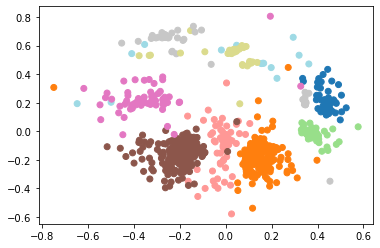

In [20]:
plt.scatter(Xhat[:,0],Xhat[:,1],c=parties[:700],cmap='tab20')

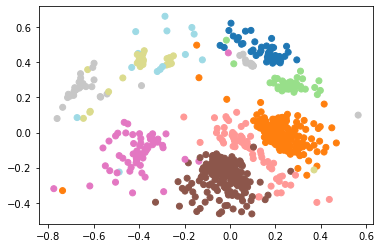

In [51]:
plt.scatter(Xhat[:,0],Xhat[:,1],c=parties[:700],cmap='tab20')

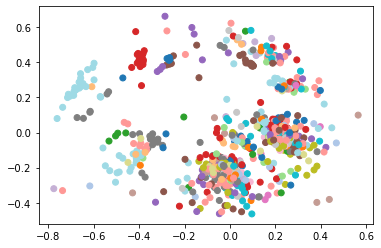

In [56]:
plt.scatter(Xhat[:,0],Xhat[:,1],c=cty[:700],cmap='tab20')

In [21]:
Xhat3 = MDS(n_components = 3, dissimilarity = 'precomputed').fit_transform(D)

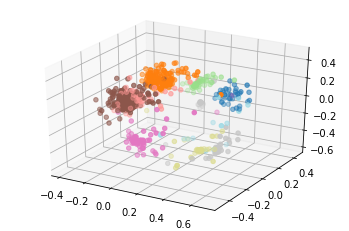

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(Xhat3[:,0],Xhat3[:,1],Xhat3[:,2], c=parties[:700], marker='o',cmap='tab20')

In [32]:
results = []
for i in range(1,2001):
    results.append(sum(df[str(i)]==0))

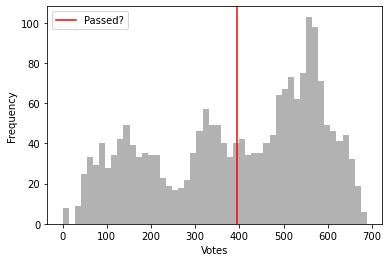

In [43]:
plt.hist(results,bins=50,alpha=.6,color='gray')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.axvline(x=787/2,color='red',label='Passed?')
plt.legend()

In [62]:
import networkx as nx
import random
def gen_graph(D):
    G = nx.Graph()
    for i in range(700):
        G.add_node(i)
        G.nodes[i]["Party"]=int(df.iloc[i]['PG_ID'])
        for j in range(700):
            if i>j:
                if random.random() < (1 - D[i,j])/3:
                    G.add_edge(i,j)
    return G
G = gen_graph(D)
#cdict = {100:"blue",200:"red",328:"green"}


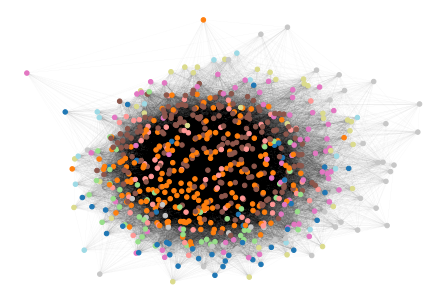

In [65]:
nx.draw(G,node_color = [G.nodes[i]["Party"] for i in G.nodes()],node_size=20,width=.01,cmap = 'tab20')

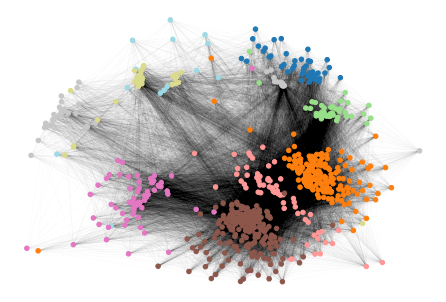

In [63]:
nx.draw(G,pos = Xhat, node_color = [G.nodes[i]["Party"] for i in G.nodes()],node_size=20,width=.01,cmap = 'tab20')

In [67]:
import json
from networkx.readwrite import json_graph
for i in range(100):
    G = gen_graph(D)
    plt.figure()
    nx.draw(G,pos = Xhat, node_color = [G.nodes[i]["Party"] for i in G.nodes()],node_size=20,width=.01,cmap = 'tab20')    
    plt.savefig(f'./Senate_Graphs/EP{i}.png')
    plt.close()
    with open(f'./Senate_Graphs/EP{i}.json', 'w') as outfile:
        json.dump(json_graph.adjacency_data(G), outfile)

421